Notebook to count particles on .tif files

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import trackpy 
import pims
from pims import ImageSequence
import trackpy as tp

In [2]:
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
image_file = r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview00000.tif'

In [4]:
print(image_file)

E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview00000.tif


In [5]:
im = Image.open(image_file)
im.show()

In [6]:
Img = plt.imread(image_file)

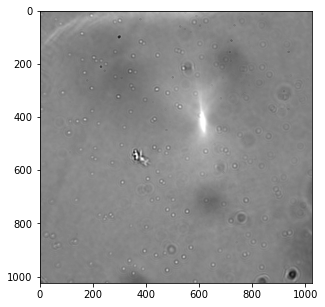

In [7]:
plt.imshow(Img, cmap='gray')

In [8]:
count_image = tp.locate(Img, 5, minmass=10000)

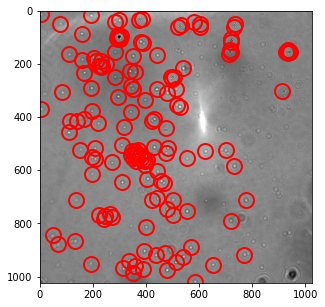

144


In [9]:
tp.annotate(count_image, Img);
print(len(count_image['mass']))

In [10]:
images = ImageSequence(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif')

In [11]:
length = len(images)
print(length)

11


In [12]:
@pims.pipeline
def gray(image):
    return image[:, :]

In [13]:
frames1 = gray(pims.open(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif'))

In [14]:
frames1
nf1 = len(frames1)
print(nf1)

11


In [15]:
plt.rcParams['figure.figsize'] = (10, 10)

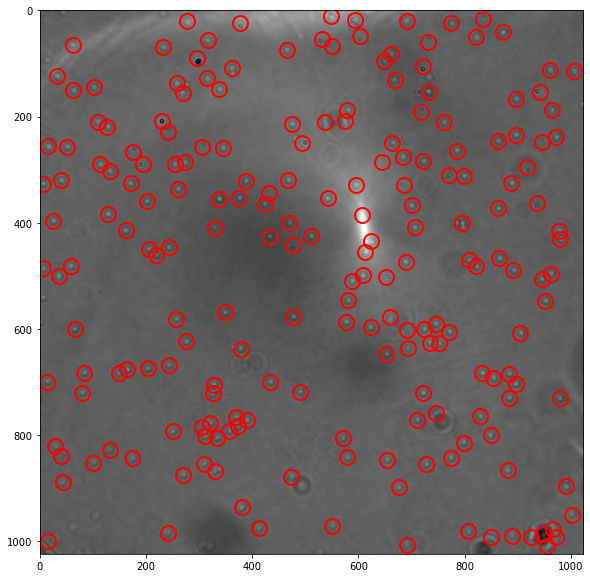

203


In [16]:
image_file = r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_60000\Overview00013.tif'
Img = plt.imread(image_file)
count_image = tp.locate(Img, 5, minmass=4000, separation=15)
tp.annotate(count_image, Img);
print(len(count_image['mass']))

The following data obtained

In [17]:
counts1 = [230, 240, 200, 180, 190, 200, 370, 400, 170, 200, 210]
counts2 = [230, 210, 260, 230, 250, 185, 145, 170, 160, 160, 240]
counts3 = [18, 30, 15, 30, 25, 25, 23, 30, 50, 25, 40]
counts4 = [250, 260, 240, 255, 270, 250, 240, 260, 230, 110, 150]
counts5 = [60, 80, 70, 60, 75, 80, 50, 90, 110, 95, 85]
counts6 = [205, 220, 210, 240, 0, 200, 200, 240, 0, 220, 195]

In [18]:
average1 = np.average(counts1)
average2 = np.average(counts2)
average3 = np.average(counts3)
average4 = np.average(counts4)
average5 = np.average(counts5)
average6 = np.average(counts6)

([<matplotlib.axis.XTick at 0x26915301be0>,
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000')])

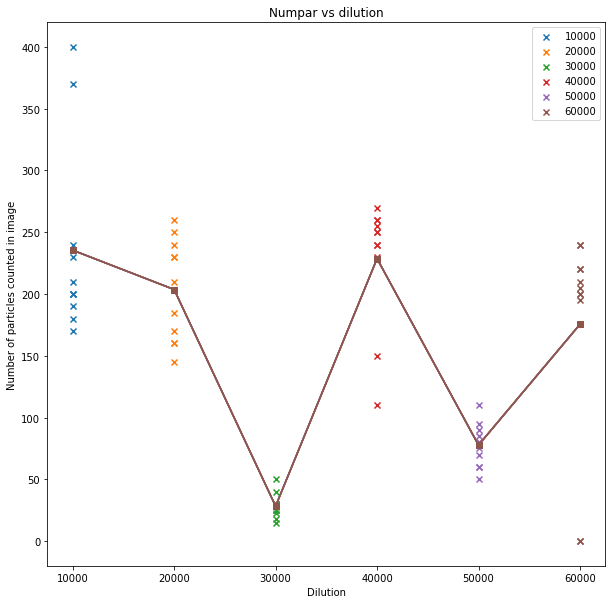

In [21]:
yvalues = [(230, 240, 200, 180, 190, 200, 370, 400, 170, 200, 210), 
           (230, 210, 260, 230, 250, 185, 145, 170, 160, 160, 240),
           (18, 30, 15, 30, 25, 25, 23, 30, 50, 25, 40),
           (250, 260, 240, 255, 270, 250, 240, 260, 230, 110, 150),
           (60, 80, 70, 60, 75, 80, 50, 90, 110, 95, 85),
           (205, 220, 210, 240, 0, 200, 200, 240, 0, 220, 195)]

averagelist = [average1, average2, average3, average4, average5, average6]

xvalues = [10000, 20000, 30000, 40000, 50000, 60000]

for xe, ye in zip(xvalues, yvalues):
    plt.scatter([xe] * len(ye), ye, marker='x', label=xe)
    plt.savefig('NumparDilution.png')
    plt.plot(xvalues, averagelist, marker='s')
#     plt.errorbar(xvalues, averagelist, yerr=40)
plt.legend()
plt.title('Numpar vs dilution')
plt.xlabel('Dilution')
plt.ylabel("Number of particles counted in image")
plt.xticks([10000, 20000, 30000, 40000, 50000, 60000])